Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the data

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Dropping variable 'Id' as it seems to have no use in prediction.

In [3]:
df = df.drop(columns = 'Id')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Let's see how 4 numeric variables are distributed, analysing their statistical summary.

In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


* With 5 point summary we conclude that Sepal Width might have got some outliers. 
* The correlation matrix shows that Sepal length has got good positive linear correlation with Petal Length and Petal Width. 
* Petal dimensions are highly positively lineraly correlated to each other.
* Sepal Width has got fairly neagative corralation with Petal dimensions.

In [6]:
df['Species'].value_counts()
# Iris species seems to be distributed equally

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

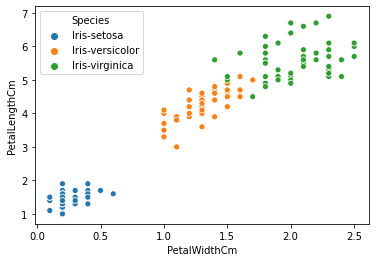

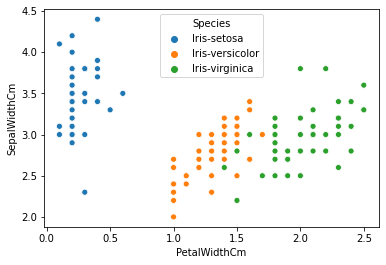

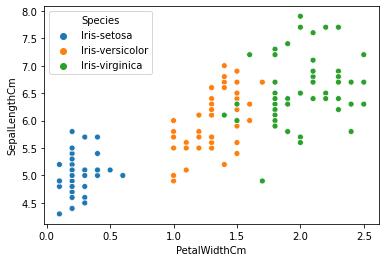

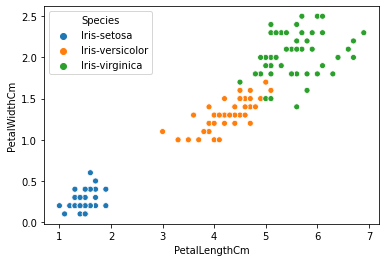

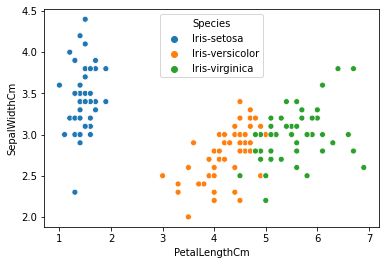

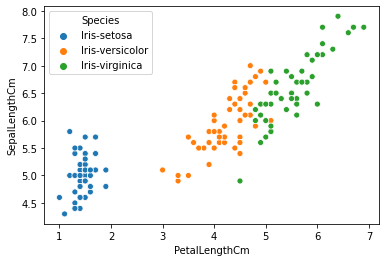

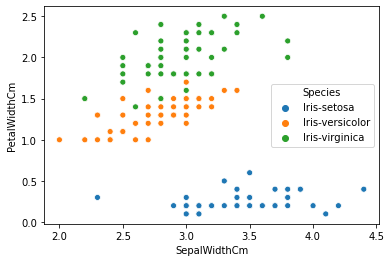

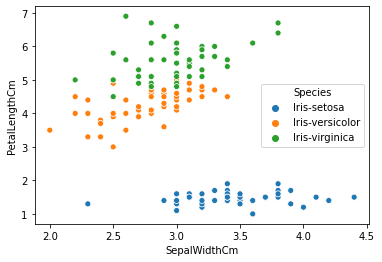

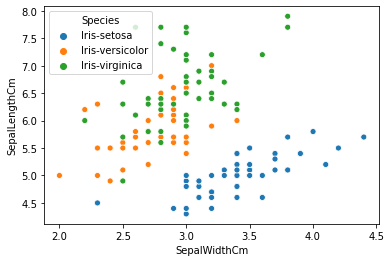

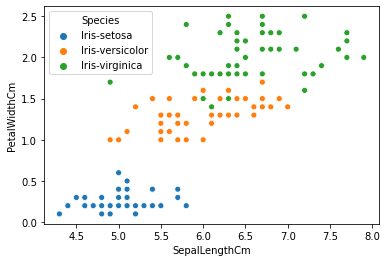

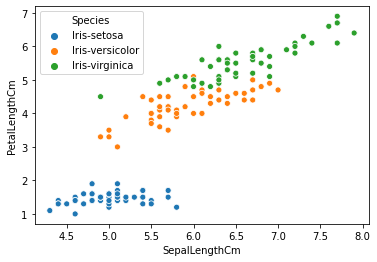

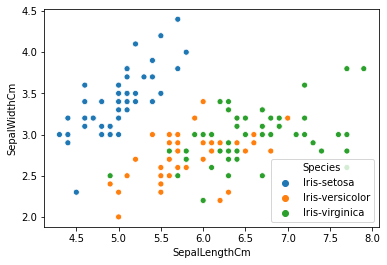

In [7]:
# Visualising the variables with each other
for i in df.columns[-2::-1]:
    for j in df.columns[-2::-1]:
        if i!=j:
            sns.scatterplot(df[i],df[j], hue = df['Species'])
            plt.show()

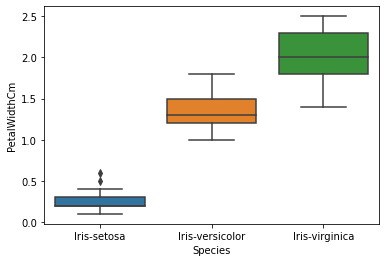

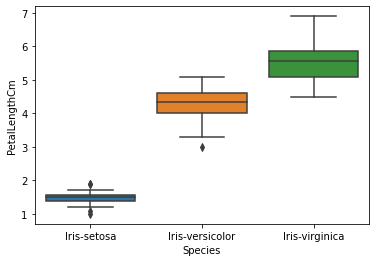

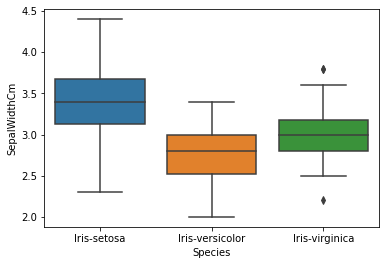

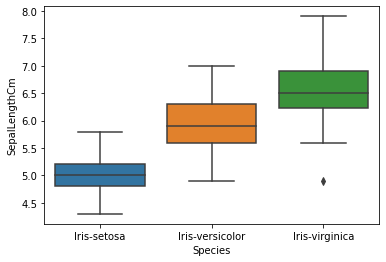

In [8]:
for i in df.columns[-2::-1]:
    sns.boxplot(df['Species'], df[i])
    plt.show()

What we can infer from scatterplots and boxplots is that Iris-Setosa species is significantly different from Iris-versicolor and Iris-Virginica, whereas Iris-versicolor and Iris-virginica might share little similarity.

In [9]:
# Splitting data into dependent and independent variables
x = df.drop(columns = 'Species')
y = df['Species']

In [10]:
# importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [11]:
# splitting data into train and test 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 25)

In [12]:
# fitting Decision Tree classifier to the training data
dt = DecisionTreeClassifier(random_state = 25)
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=25)

In [13]:
# importing necessary libraries inorder to evaluate how trained model is working
from sklearn.metrics import classification_report, confusion_matrix

train_pred = dt.predict(xtrain)

print('\033[1m' + 'Trained Data Metrics' + '\033[0m')
print('Confusion Matrix: \n',confusion_matrix(ytrain, train_pred))
print('Classification Report: \n', classification_report(ytrain, train_pred))

Trained Data Metrics
Confusion Matrix: 
 [[33  0  0]
 [ 0 34  0]
 [ 0  0 38]]
Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        33
Iris-versicolor       1.00      1.00      1.00        34
 Iris-virginica       1.00      1.00      1.00        38

       accuracy                           1.00       105
      macro avg       1.00      1.00      1.00       105
   weighted avg       1.00      1.00      1.00       105



In [14]:
# Importing necessray libraries for visualising Decision Tree
from IPython.display import Image  
from sklearn import tree
import os 

Iris_Tree_File = open('iris_tree.dot','w')
dot_data = tree.export_graphviz(dt, out_file=Iris_Tree_File, 
                                feature_names = list(xtrain), class_names = list(ytrain),
                                filled = True, rounded = True)

Iris_Tree_File.close()

In [15]:
os.environ["PATH"] += os.pathsep + 'E:/Graphviz/bin/'

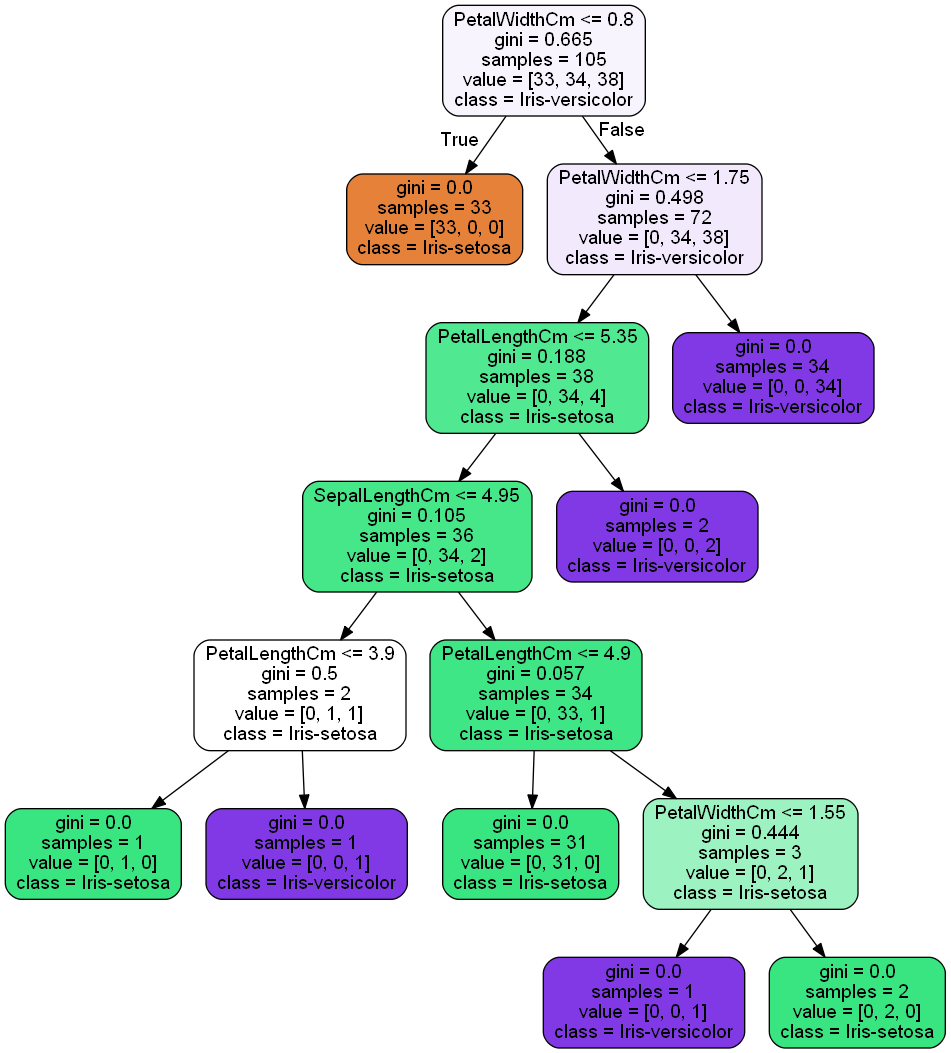

In [16]:
os.system("dot -Tpng iris_tree.dot -o iris_tree.png")   
Image("iris_tree.png") 

In [17]:
# evaluating how trained model is working for test data
test_pred = dt.predict(xtest)

print('\033[1m' + 'Test Data Metrics' + '\033[0m')
print('Confusion Matrix: \n',confusion_matrix(ytest, test_pred))
print('Classification Report: \n', classification_report(ytest, test_pred))

Test Data Metrics
Confusion Matrix: 
 [[17  0  0]
 [ 0 15  1]
 [ 0  0 12]]
Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

